<h1>HW4</h1>

# Question 1
### (Binomial) Read the following example and complete the exercises 

#### Tossing a Biased Coin
You are asked if you want to bet on a coin. 
```
You have 10 coin tosses. 
```
```
If you get exactly 4 heads, you win 30 dollars. 
```
```
Otherwise you loss 5 dollars. 
```
```
Based on our previous observation, the coin is biased. The chance of getting head is approximately 0.4. 
```
Now you need to think about if you want to play it or not. 

### 1.1 

You recall that binomial distribution is commonly used to determine the probability of observing a specified number of successful outcomes in a specified number of trials. The equation for pdf of binomial distribution is: 

\begin{equation*}
P(X = k) = \frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}
\end{equation*}

Where 
```
k: Number of successful trials
n: Total number of trials
p: Probability of success in one trial
```

Create a functon to calculate the pdf of a binomial distribution

```
Function name: binomial_p
```
```
Input: n, k, p
```
```
Output: pdf of a binomial distribution
```
```
Example: binomial_p(10, 2, 0.4) = 0.12093235199999998
```

In [6]:
function binomial_p(n::Int, k::Int, p::Float64)
    if k < 0 || k > n || p < 0 || p > 1
        return 0.0
    end

# Compute n! / (k!(n-k)!)
    coef = binomial(n, k)  
    prob = coef * (p^k) * ((1 - p)^(n - k))
    return prob
end    

binomial_p(10, 4, 0.4)

0.250822656

### 1.2 

Now you want to use the function to calculate the probabilities of 
1. Winning the bet
2. Losing the bet

The chance of winning the bet:

In [7]:
# Must be EXACTLY FOUR heads out of ten
n = 10      # Number of tosses
k = 4   # Winning condition (exactly 4 heads)
p = 0.4     # Probability of getting heads

win_prob = binomial_p(n, k, p)

println("Winning Probability: ", win_prob)


Winning Probability: 0.250822656


The chance of losing the bet:

In [8]:
# Losing is any outcome except exactly 4 heads
loss_prob = 1 - win_prob  
println("Losing Probability: ", loss_prob)



Losing Probability: 0.749177344


### 1.3

Would you expect yourself earning or losing money in the game?

\*Hint: What is the expected outcome

In [30]:
win_amount = 30   # Dollars won if exactly 4 heads
loss_amount = 5  # Dollars lost otherwise

expected_value = (win_amount * win_prob) - (loss_amount * loss_prob)
println("Expected Number of Heads: ", expected_value)
println("There is an expected value of getting 3.8 heads, which, since you cannot have an eighth of a coin toss, we would round up to four. I would expect to earn money!")

Expected Number of Heads: 3.778792959999999
There is an expected value of getting 3.8 heads, which, since you cannot have an eighth of a coin toss, we would round up to four. I would expect to earn money!


### 1.4

1. What if you need to get exactly 3 heads to win the game? What are the probabilities of winning and losing? 

2. Would you expect yourself earning or losing money in this case?

In [39]:
n2 = 10      # Number of tosses
k2 = 3   # Winning condition (exactly 3 heads)
p2 = 0.4     # Probability of getting heads

win_prob2 = binomial_p(n2, k2, p2)
loss_prob2 = 1-win_prob2

println("Winning Probability: ", win_prob2)
println("Losing Probability: ", loss_prob2)

Winning Probability: 0.21499084799999998
Losing Probability: 0.785009152


In [40]:
win_amount2 = 30   # Dollars won if exactly 3 heads
loss_amount2 = 5  # Dollars lost otherwise

expected_value2 = (win_amount * win_prob2) - (loss_amount * loss_prob2)
println("Expected Number of Heads: ", expected_value2)
println("In ten tosses, I would be expected to land heads 2.5 times. If we round 0.5 up, we should expect to earn money!.")

Expected Number of Heads: 2.52467968
In ten tosses, I would be expected to land heads 2.5 times. If we round 0.5 up, we should expect to earn money!.


# Question 2
### (Chi-Square) Complete the following exercises 


#### Run the following three cells to define x, y_true, noise, and y_oberved

1. x = 0:1:10
2. y_true = 4x - 2
3. noise = N(0, $\sigma$ = 3)
4. y_observed = y_true + noise


In [29]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\steal\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Project.toml`
  [10745b16] + Statistics v1.11.1
  No Changes to `C:\Users\steal\Downloads\Zero2Hero-JuliaWorkshop-main\BME-502-2025-homeworks\Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

In [3]:
x = 0:1:10
y_true = 4 .* x .- 2
sigma = 3
noise = Random.rand(di.Normal(0,sigma),length(x))
y_observed = y_true .+ noise;

### 2.1

1. Fit the data with a first order polynomial
2. Store the coefficients of the fitted polynomial in fit_coeff

In [ ]:
#using Dr. Strey's polynomial least squares fit notes
using Polynomials  # Ensure Polynomials package is imported

# Fit a first-order polynomial (linear regression)
fit_poly = Polynomials.fit(x, y_observed, 1)

# Extract coefficients
fit_coeff = coeffs(fit_poly)

println("Fitted Coefficients: ", fit_coeff)

Fitted Coefficients: [0.6558800446612114, 3.804941143623864]


### 2.2

Given $\chi^2$ defined as:
$$\chi^{2}=\sum_{i}^{N}{\frac{(y_{i}-f(x_{i},\theta))^2}{\sigma_{i}^2}}$$

Create a function to calculate Chi-square value for the $1^{st}$ order polynomial fit

```
Function name: chisqr
```
```
Input: b, m, x, y_observed, sigma
```
```
m and b are the coefficients in the first order polynomial in which m * x + b = y_fit
```
```
Output: Chi-square value of the polynomial model
```

In [42]:
function chisqr(b, m, x, y_observed, sigma)
    y_fit = (m.*x) .+b
    chi_sq = sum(((y_observed .- y_fit) .^2)./sigma^2)
    return chi_sq
end


b, m = fit_coeff  # Extract coefficients from previous polynomial fit
chi_square_value = chisqr(b, m, x, y_observed, sigma)

println("Chi-square value: ", chi_square_value)

Chi-square value: 19.398069182256364


### 2.3

\* Don't define random seed anywhere in the notebook
1. Create a empty list chi2_list
2. Use a for/while loop to run through the data simulation and model fitting (as done in the previous steps) 10000 times
3. In each iteration, calculate the Chi-square value for the fitted model and add it to the chi2_list


In [45]:
chi2_list = []

for i in 1:10000
    noise = Random.rand(di.Normal(0, sigma), length(x))  # Generate new noise
    y_observed = y_true .+ noise  # Create new noisy dataset

    fit_poly = Polynomials.fit(x, y_observed, 1)  # Fit first-order polynomial
    fit_coeff = coeffs(fit_poly)  # Get coefficients (b = fit_coeff[1], m = fit_coeff[2])

    chi_sq = chisqr(fit_coeff[1], fit_coeff[2], x, y_observed, sigma)  # Compute Chi-square
    push!(chi2_list, chi_sq)  # Store in list
end

println("Chi-square simulation complete!")


Chi-square simulation complete!


### 2.4

1. Calculate the mean of chi2_list
2. Explain if the mean value (degree of freedom) make sense or not


In [46]:
using Statistics  # Import statistics package for mean calculation

chi2_mean = mean(chi2_list)  # Calculate mean of chi2_list
println("Mean Chi-square value: ", chi2_mean)


Mean Chi-square value: 9.017695281679174


### 2.5

1. Define a Chi-square distribution using the Degree of freedom from 2.4
2. Generate x_dist = 0:0.1:40
3. Calculate pdf of the Chi-square distribution using x_dist
4. Plot the chi2_list in a histogram with bin = 50 
5. Plot the pdf on top of the chi2_list histogram 

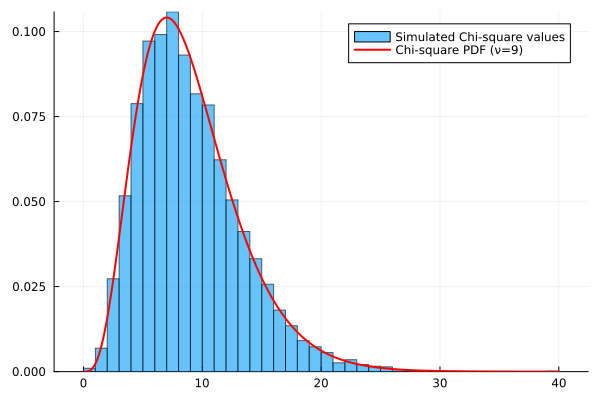

In [69]:
using Plots, Distributions  # Import required packages

# Define degrees of freedom (from 2.4)
dof = 9  

# Define Chi-square distribution
chi2_dist = di.Chisq(dof)  

# Generate x values for PDF plot
x_dist = 0:0.1:40  

# Compute Chi-square PDF
pdf_values = pdf.(chi2_dist, x_dist)  

# Plot histogram of chi2_list
histogram(chi2_list, bins=50, norm=true, alpha=0.6, label="Simulated Chi-square values")

# Overlay Chi-square PDF
plot!(x_dist, pdf_values, linewidth=2, label="Chi-square PDF (ν=9)", color=:red)


### 2.6

Given the likelihood is:
$$P(\{y_{i}(x_{i})\}\mid \theta)\propto \exp\big(-\frac{\chi^2}{2}\big)$$

1. Run the following cell to create a function to calculate the likelihood (make sure you named the variables as asked in the previous questions)
2. Define m_range = 1:0.01:8
3. Define b_range = -9:0.01:10
4. Make a contour plot to visualize the distribution of the likelihood


In [56]:
chi2poly(b, m) = chisqr(b, m, x, y_observed, sigma)
p_chi2poly(b, m) = exp(-chi2poly(b, m)/2);

In [70]:
using Plots, Distributions, Statistics

function likelihood(m, b, x, y_observed, sigma)
    chi_sq = chisqr(b, m, x, y_observed, sigma)
    return exp(-chi_sq / 2) 
end

m_range = 1:0.01:8
b_range = -9:0.01:10

likelihood_values = [likelihood(m, b, x, y_observed, sigma) for m in m_range, b in b_range]

# Contour plot of likelihood
p = contour(m_range, b_range, likelihood_values, xlabel="Slope (m)", ylabel="Intercept (b)", title="Likelihood Distribution", color=:viridis)
display(p)

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


### 2.7

1. Redefine x = 0:0.5:4 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6
2. Redefine x = 0:2:20 and update y_observed. Plot the likelihood with the new x, y_observed and explain how the plot is different from 2.6

In [55]:
x = 0:0.5:4
y_true = 4 .* x .- 2
noise = Random.rand(di.Normal(0, sigma), length(x))
y_observed = y_true .+ noise

# Compute new likelihood values
likelihood_values = [likelihood(m, b, x, y_observed, sigma) for m in m_range, b in b_range]

# Plot the new likelihood
contourf(m_range, b_range, likelihood_values, xlabel="Slope (m)", ylabel="Intercept (b)", title="Likelihood with x = 0:0.5:4", color=:viridis)


attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


In [51]:
x = 0:2:20
y_true = 4 .* x .- 2
noise = Random.rand(di.Normal(0, sigma), length(x))
y_observed = y_true .+ noise

# Compute new likelihood values
likelihood_values = [likelihood(m, b, x, y_observed, sigma) for m in m_range, b in b_range]

# Plot the new likelihood
contour(m_range, b_range, likelihood_values, xlabel="Slope (m)", ylabel="Intercept (b)", title="Likelihood with x = 0:2:20", color=:viridis)


### 2.8

Change x back to x = 0:1:10

1. Redefine sigma = 6 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6
2. Redefine sigma = 1.5 and update y_observed. Plot the likelihood with the new y_observed and explain how the plot is different from 2.6

In [52]:
x = 0:1:10
sigma = 6
y_true = 4 .* x .- 2
noise = Random.rand(di.Normal(0, sigma), length(x))
y_observed = y_true .+ noise

# Compute new likelihood values
likelihood_values = [likelihood(m, b, x, y_observed, sigma) for m in m_range, b in b_range]

# Plot the new likelihood
contour(m_range, b_range, likelihood_values, xlabel="Slope (m)", ylabel="Intercept (b)", title="Likelihood with sigma = 6", color=:viridis)


In [54]:
sigma = 1.5
y_true = 4 .* x .- 2
noise = Random.rand(di.Normal(0, sigma), length(x))
y_observed = y_true .+ noise

# Compute new likelihood values
likelihood_values = [likelihood(m, b, x, y_observed, sigma) for m in m_range, b in b_range]

# Plot the new likelihood
contour(m_range, b_range, likelihood_values, xlabel="Slope (m)", ylabel="Intercept (b)", title="Likelihood with sigma = 1.5", color=:viridis)


attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
attempt to save state beyond implementation limit
